20180634_최준혁_과제2번

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa import stattools
import statsmodels.api as sm
import pandas_datareader as wb
import datetime
from pandas import read_excel
import warnings
warnings.filterwarnings('ignore')

### Using Python, perform the following for the KOSPI index returns during the period 2021:01:02-2021:12:30 (on the basis of daily, closing prices).

In [2]:
s = datetime.datetime(2021,1,2)
e = datetime.datetime(2021,12,30)
data = wb.DataReader("^KS11",'yahoo',s,e)
df1 = data['Close'].dropna()
df2 = data[['Close']].dropna()

In [3]:
df1 #2021년 장이 1월 4일(월)에 열림

Date
2021-01-04    2944.449951
2021-01-05    2990.570068
2021-01-06    2968.209961
2021-01-07    3031.679932
2021-01-08    3152.179932
                 ...     
2021-12-24    3012.429932
2021-12-27    2999.550049
2021-12-28    3020.239990
2021-12-29    2993.290039
2021-12-30    2977.649902
Name: Close, Length: 248, dtype: float64

In [4]:
log_kospi = np.log(df1) #log_kospi는 kospi에 log를 취한 값

log_return = [] #log_return은 log difference
for j in range(len(df1)):
    if j == 0 : continue
    else : log_return.append(np.log(df1[j])-np.log(df1[j-1])) 
log_return = pd.Series(log_return)

In [5]:
log_kospi

Date
2021-01-04    7.987677
2021-01-05    8.003219
2021-01-06    7.995714
2021-01-07    8.016872
2021-01-08    8.055850
                ...   
2021-12-24    8.010502
2021-12-27    8.006218
2021-12-28    8.013092
2021-12-29    8.004128
2021-12-30    7.998890
Name: Close, Length: 248, dtype: float64

In [6]:
log_return

0      0.015542
1     -0.007505
2      0.021158
3      0.038977
4     -0.001184
         ...   
242    0.004745
243   -0.004285
244    0.006874
245   -0.008963
246   -0.005239
Length: 247, dtype: float64

#### (a) (2 points) Find a proper ARMA model for the log KOSPI index.
- log KOSPI index가 코스피에 log를 취한 것인지 지난과제에서 의미하는 log_difference return을 의미하는지 혼동되어 두가지로 모두 진행했습니다!

ans: ARMA(1,0) is a proper model(log_kospi)

In [7]:
res = sm.tsa.arma_order_select_ic(log_kospi,max_ar = 4, max_ma = 4, ic=["aic", "bic"], trend="c")
print("----log_kospi----")
print("best_aic :",res.aic_min_order)
print("best_bic :",res.bic_min_order)
#ARMA(1,0) is a proper model(log_kospi)

----log_kospi----
best_aic : (1, 0)
best_bic : (1, 0)


ans: ARMA(0,0) is a proper model(log_return)

In [8]:
res = sm.tsa.arma_order_select_ic(log_return,max_ar = 4, max_ma = 4,ic=["aic", "bic"], trend="c")
print("----log_return----")
print("best_aic :",res.aic_min_order)
print("best_bic :",res.bic_min_order)
#ARMA(0,0) is a proper model(log_return)

----log_return----
best_aic : (0, 0)
best_bic : (0, 0)


In [9]:
kospi = sm.tsa.ARIMA(log_kospi,trend='c',order=(1,0,0)).fit()
print(kospi.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  248
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 786.229
Date:                Tue, 11 Oct 2022   AIC                          -1566.458
Time:                        03:37:54   BIC                          -1555.918
Sample:                             0   HQIC                         -1562.215
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0351      0.013    636.216      0.000       8.010       8.060
ar.L1          0.9544      0.021     46.365      0.000       0.914       0.995
sigma2         0.0001   7.59e-06     13.456      0.0

In [10]:
ln_return = sm.tsa.ARIMA(log_return,trend='c',order=(0,0,0)).fit()
print(ln_return.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  247
Model:                          ARIMA   Log Likelihood                 781.942
Date:                Tue, 11 Oct 2022   AIC                          -1559.884
Time:                        03:37:54   BIC                          -1552.865
Sample:                             0   HQIC                         -1557.058
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.034e-05      0.001      0.062      0.951      -0.001       0.001
sigma2         0.0001   7.59e-06     13.722      0.000    8.93e-05       0.000
Ljung-Box (L1) (Q):                   0.03   Jarque-

#### (b) (2 points) Test whether the log KOSPI index has a unit root or not using the augmented Dickey-Fuller test.

ans : log_kospi는 p-value = 0.1297 -> NON-stationary, unit root가 있다

In [11]:
from statsmodels.tsa.stattools import adfuller

adfuller(log_kospi, regression='c') #1번째 결과 : test statistics , 2번째 결과 : p-value
#log_kospi는 p-value = 0.1297 -> NON-stationary, unit root가 있다

(-2.443743228499484,
 0.12976877579460117,
 0,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 -1499.4649783311263)

ans : log_return은 p-value = 매우 낮음 -> stationary, unit root가 없다.

In [12]:
adfuller(log_return, regression='c')
#log_return은 p-value = 매우 낮음 -> stationary, unit root가 없다.

(-10.507441759062361,
 1.0453766982299086e-18,
 2,
 244,
 {'1%': -3.457437824930831,
  '5%': -2.873459364726563,
  '10%': -2.573122099570008},
 -1489.533956433947)

### (2 points) Find a proper SARIMA model for the monthly Korean unemployment rate during the period 2010:01-2021:12.
- 교수님꼐서 올려주신 data가 2012:01~2019:02까지 있으므로 해당 기간 데이터로 진행하겠습니다!

In [13]:
# 기간: 2012:01 - 2019:02
excel_data= read_excel('./연령별_경제활동인구_총괄_20190403.xlsx', '데이터') 
# excel_data= read_excel('c:/연령별_경제활동인구_총괄_20190418164345_A.xlsx', '데이터') 

In [14]:
dates = pd.date_range('2012', periods= 86, freq='m')
dates

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [15]:
data=excel_data.values
urate=[]
for i in range(86):
    urate.append(data[1,7+i*8])

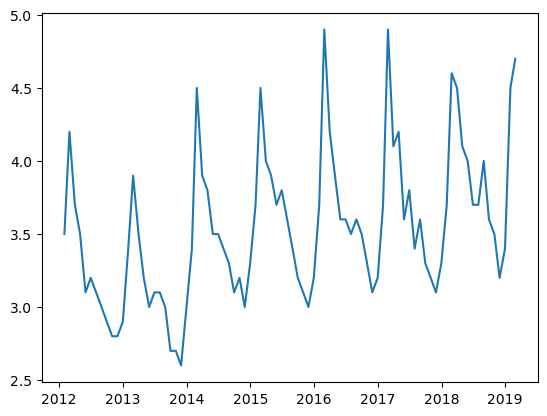

In [16]:
plt.plot(dates, urate)
plt.show()

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

p=d=q = range(0,3)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [18]:
best_aic = np.inf 
best_pdq = None
best_seasonal_pdq = None
top_model = None
best_mdl = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try: 
            tmp_mdl = sm.tsa.statespace.SARIMAX(urate, exog = None, order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity = True,
                                                enforce_invertibility = True, trend = "c")
            res = tmp_mdl.fit()
            print("SARIMAX{}x{}12 - AIC:{}".format(param,param_seasonal, res.aic))
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
                print("OK")
        except : 
            print("unexpecter error")
            continue
print("Best SARIMAX{}x{}12 model - AIC: {}".format(best_pdq, best_seasonal_pdq, best_aic))

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:131.69053912315917
OK
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:82.32524864491414
OK
SARIMAX(0, 0, 0)x(0, 0, 2, 12)12 - AIC:55.86263705053869
OK
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-0.6037660843963373
OK
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-27.572832031749492
OK
SARIMAX(0, 0, 0)x(0, 1, 2, 12)12 - AIC:-25.574150337476624
SARIMAX(0, 0, 0)x(0, 2, 0, 12)12 - AIC:62.615513729294356
SARIMAX(0, 0, 0)x(0, 2, 1, 12)12 - AIC:32.924712909187605
SARIMAX(0, 0, 0)x(0, 2, 2, 12)12 - AIC:25.611345416380537
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:31.006666721691122
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:32.133316419638106
SARIMAX(0, 0, 0)x(1, 0, 2, 12)12 - AIC:32.47954705125465
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-17.79832642624837
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-25.576675465385804
SARIMAX(0, 0, 0)x(1, 1, 2, 12)12 - AIC:-24.081345760821208
SARIMAX(0, 0, 0)x(1, 2, 0, 12)12 - AIC:38.851966317402635
SARIMAX(0, 0, 0)x(1, 2, 1, 12)12 - AIC:27.3439335690182

SARIMAX(0, 1, 2)x(0, 2, 1, 12)12 - AIC:18.679569180201984
SARIMAX(0, 1, 2)x(0, 2, 2, 12)12 - AIC:15.202260620921326
SARIMAX(0, 1, 2)x(1, 0, 0, 12)12 - AIC:-3.7384851042675162
SARIMAX(0, 1, 2)x(1, 0, 1, 12)12 - AIC:-14.782124055976752
SARIMAX(0, 1, 2)x(1, 0, 2, 12)12 - AIC:-12.80785437489132
SARIMAX(0, 1, 2)x(1, 1, 0, 12)12 - AIC:-29.699339981659456
SARIMAX(0, 1, 2)x(1, 1, 1, 12)12 - AIC:-28.830005078658218
SARIMAX(0, 1, 2)x(1, 1, 2, 12)12 - AIC:-27.58953729686268
SARIMAX(0, 1, 2)x(1, 2, 0, 12)12 - AIC:17.293676327457877
SARIMAX(0, 1, 2)x(1, 2, 1, 12)12 - AIC:13.619697448503501
SARIMAX(0, 1, 2)x(1, 2, 2, 12)12 - AIC:15.618086670244226
SARIMAX(0, 1, 2)x(2, 0, 0, 12)12 - AIC:-14.369215478162864
SARIMAX(0, 1, 2)x(2, 0, 1, 12)12 - AIC:-12.863984621276899
SARIMAX(0, 1, 2)x(2, 0, 2, 12)12 - AIC:-11.192208827594666
SARIMAX(0, 1, 2)x(2, 1, 0, 12)12 - AIC:-28.040959560259097
SARIMAX(0, 1, 2)x(2, 1, 1, 12)12 - AIC:-27.52773363194558
SARIMAX(0, 1, 2)x(2, 1, 2, 12)12 - AIC:-26.60592337130013
SARIMA

SARIMAX(1, 0, 1)x(1, 1, 2, 12)12 - AIC:-33.19241958412269
SARIMAX(1, 0, 1)x(1, 2, 0, 12)12 - AIC:14.821069613148268
SARIMAX(1, 0, 1)x(1, 2, 1, 12)12 - AIC:10.554169979660635
SARIMAX(1, 0, 1)x(1, 2, 2, 12)12 - AIC:12.879343394524582
SARIMAX(1, 0, 1)x(2, 0, 0, 12)12 - AIC:-16.845871535325657
SARIMAX(1, 0, 1)x(2, 0, 1, 12)12 - AIC:-13.936234510971271
SARIMAX(1, 0, 1)x(2, 0, 2, 12)12 - AIC:-11.07735590485336
SARIMAX(1, 0, 1)x(2, 1, 0, 12)12 - AIC:-32.81158716583137
SARIMAX(1, 0, 1)x(2, 1, 1, 12)12 - AIC:-33.37191976419765
SARIMAX(1, 0, 1)x(2, 1, 2, 12)12 - AIC:-32.41128734020651
SARIMAX(1, 0, 1)x(2, 2, 0, 12)12 - AIC:12.009234295270693
SARIMAX(1, 0, 1)x(2, 2, 1, 12)12 - AIC:12.55352829929695
SARIMAX(1, 0, 1)x(2, 2, 2, 12)12 - AIC:14.553509277541252
SARIMAX(1, 0, 2)x(0, 0, 0, 12)12 - AIC:73.5553132904283
SARIMAX(1, 0, 2)x(0, 0, 1, 12)12 - AIC:34.734989899276385
SARIMAX(1, 0, 2)x(0, 0, 2, 12)12 - AIC:7.665993308048382
SARIMAX(1, 0, 2)x(0, 1, 0, 12)12 - AIC:-26.7072869406815
SARIMAX(1, 0, 2)x

SARIMAX(1, 2, 0)x(2, 1, 0, 12)12 - AIC:17.08277027480659
SARIMAX(1, 2, 0)x(2, 1, 1, 12)12 - AIC:18.639352843295626
SARIMAX(1, 2, 0)x(2, 1, 2, 12)12 - AIC:18.67182084757698
SARIMAX(1, 2, 0)x(2, 2, 0, 12)12 - AIC:45.66430385856127
SARIMAX(1, 2, 0)x(2, 2, 1, 12)12 - AIC:46.87436300708386
SARIMAX(1, 2, 0)x(2, 2, 2, 12)12 - AIC:48.86181452959473
SARIMAX(1, 2, 1)x(0, 0, 0, 12)12 - AIC:98.87130364888131
SARIMAX(1, 2, 1)x(0, 0, 1, 12)12 - AIC:59.098076231069236
SARIMAX(1, 2, 1)x(0, 0, 2, 12)12 - AIC:31.794254383465137
SARIMAX(1, 2, 1)x(0, 1, 0, 12)12 - AIC:-11.72292887103831
SARIMAX(1, 2, 1)x(0, 1, 1, 12)12 - AIC:-17.37428466518022
SARIMAX(1, 2, 1)x(0, 1, 2, 12)12 - AIC:-16.63140707348619
SARIMAX(1, 2, 1)x(0, 2, 0, 12)12 - AIC:49.80162859279401
SARIMAX(1, 2, 1)x(0, 2, 1, 12)12 - AIC:23.186749376597476
SARIMAX(1, 2, 1)x(0, 2, 2, 12)12 - AIC:19.561840002572087
SARIMAX(1, 2, 1)x(1, 0, 0, 12)12 - AIC:-1.4651338182866898
SARIMAX(1, 2, 1)x(1, 0, 1, 12)12 - AIC:5.236230071669721
SARIMAX(1, 2, 1)x(1, 

SARIMAX(2, 1, 0)x(0, 0, 1, 12)12 - AIC:54.969875648082095
SARIMAX(2, 1, 0)x(0, 0, 2, 12)12 - AIC:26.50464099324996
SARIMAX(2, 1, 0)x(0, 1, 0, 12)12 - AIC:-18.374371416011115
SARIMAX(2, 1, 0)x(0, 1, 1, 12)12 - AIC:-29.05293703435855
SARIMAX(2, 1, 0)x(0, 1, 2, 12)12 - AIC:-27.21658879233793
SARIMAX(2, 1, 0)x(0, 2, 0, 12)12 - AIC:43.96595219924471
SARIMAX(2, 1, 0)x(0, 2, 1, 12)12 - AIC:16.414558063166247
SARIMAX(2, 1, 0)x(0, 2, 2, 12)12 - AIC:13.22324965712605
SARIMAX(2, 1, 0)x(1, 0, 0, 12)12 - AIC:-5.154276403112826
SARIMAX(2, 1, 0)x(1, 0, 1, 12)12 - AIC:-12.946196497437594
SARIMAX(2, 1, 0)x(1, 0, 2, 12)12 - AIC:-11.322838223858493
SARIMAX(2, 1, 0)x(1, 1, 0, 12)12 - AIC:-29.61343024301768
SARIMAX(2, 1, 0)x(1, 1, 1, 12)12 - AIC:-27.674629679730913
SARIMAX(2, 1, 0)x(1, 1, 2, 12)12 - AIC:-26.34457502494262
SARIMAX(2, 1, 0)x(1, 2, 0, 12)12 - AIC:13.472734858201237
SARIMAX(2, 1, 0)x(1, 2, 1, 12)12 - AIC:11.50137963151785
SARIMAX(2, 1, 0)x(1, 2, 2, 12)12 - AIC:13.478807617683668
SARIMAX(2, 1, 

SARIMAX(2, 2, 2)x(0, 2, 2, 12)12 - AIC:23.36807660768961
SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:2.285804405474348
SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:-5.179541890789814
SARIMAX(2, 2, 2)x(1, 0, 2, 12)12 - AIC:3.4778418132441544
SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:-18.176197855663858
SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:-16.25257896903645
SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:-14.254939744150164
SARIMAX(2, 2, 2)x(1, 2, 0, 12)12 - AIC:22.868146024549585
SARIMAX(2, 2, 2)x(1, 2, 1, 12)12 - AIC:21.797932872576922
SARIMAX(2, 2, 2)x(1, 2, 2, 12)12 - AIC:23.996127429866654
SARIMAX(2, 2, 2)x(2, 0, 0, 12)12 - AIC:-6.6547563567017
SARIMAX(2, 2, 2)x(2, 0, 1, 12)12 - AIC:-3.901691349236387
SARIMAX(2, 2, 2)x(2, 0, 2, 12)12 - AIC:-2.1012291546150124
SARIMAX(2, 2, 2)x(2, 1, 0, 12)12 - AIC:-16.173915834394478
SARIMAX(2, 2, 2)x(2, 1, 1, 12)12 - AIC:-14.196974731191581
SARIMAX(2, 2, 2)x(2, 1, 2, 12)12 - AIC:-12.89369562348908
SARIMAX(2, 2, 2)x(2, 2, 0, 12)12 - AIC:21.81485526440195
SARIMAX(2, 2, 

ans : SARIMAX(0, 0, 2)x(0, 1, 1, 12)12 model이 가장 적합한 모형이다(AIC기준) AIC: -41.05194139556728

In [19]:
mdl = sm.tsa.statespace.SARIMAX(urate, order = (0,0,2),seasonal_order = (0,1,1,12),
                                enforce_stationarity = True,
                                enforce_invertibility = True)
res = mdl.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   86
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                  17.026
Date:                              Tue, 11 Oct 2022   AIC                            -26.053
Time:                                      03:50:10   BIC                            -16.837
Sample:                                           0   HQIC                           -22.376
                                               - 86                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4324      0.104      4.147      0.000       0.228       0.637
ma.L2          0.6349      0.120      5.271      0.000       0.399       0.871
ma.S.L12      -0.2553      0.191     -1.340      0.180      -0.629       0.118
sigma2         0.0360      0.004      8.147      0.000       0.027       0.045
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                27.12
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             1.00
Prob(H) (two-sided):                  0.11   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""